# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 9


### Zadanie 1

1. Wczytaj plik `mieszkania.csv`, np. za pomocą:
    - biblioteki [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (`read_csv`),
    - biblioteki [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (`genfromtxt`),
    - biblioteki [`csv`](https://docs.python.org/3/library/csv.html) (`reader`).
1. Usuń nieprawidłowe dane np. wiersz zawierający wartość `-` lub wartość $0$ powinien zostać usunięty.
1. Zamień wartości liczbowe w formacie tekstowym na typ liczbowy.
1. Wyświetl **funkcję masy prawdopodobieństwa** wartości mieszkania dla różnych rodzajów "transakcji rynkowych". Podpowiedź: możesz skożystać z funkcji `displot` z modułu `seaborn` (jeżeli nie posiadasz to możesz zainstalować za pomocą `pip install seaborn`).
1. Wyświetl wszystkie trzy powyższe funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.
1. Opisz wyniki.

_Informacja odnośnie zbioru danych:_

- _Prezentowane dane dotyczące wielkości sprzedaży oraz cen nieruchomości zostały pobrane z GUSu i opracowane na podstawie informacji pozyskanych z Rejestru Cen Nieruchomości (RCN) – do 31 lipca Rejestru Cen i Wartości Nieruchomości (RCiWN) –  prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu przy wykorzystaniu informacji pochodzących z aktów notarialnych. Obserwacji podlegają tylko te transakcje kupna/sprzedaży nieruchomości, które zostały zawarte w trakcie badanego okresu oraz zostały zarejestrowane w RCN przed datą przekazania wyciągu z rejestru do Głównego Urzędu Statystycznego. Prezentowane są dane dla lokali mieszkalnych znajdujących się w budynkach wielorodzinnych (potocznie mieszkania w blokach), bez informacji o domach jednorodzinnych._
- _Prezentowane dane dotyczą sprzedaży o charakterze rynkowym tj. sprzedaży na wolnym rynku (z pewnymi wyłączeniami, np. sprzedaży między stronami spokrewnionymi) oraz sprzedaży przetargowej. W przypadku braku odpowiedniej informacji w zbiorach pochodzących z RCN (do 31 lipca 2021 r. – RCiWN), podział na rynek pierwotny i wtórny został przeprowadzony przyjmując założenie, że sprzedaż na rynku pierwotnym dotyczy transakcji dokonywanych na wolnym rynku, gdzie stroną sprzedającą jest osoba prawna i średnia cena za 1 m2 powierzchni użytkowej lokalu wynosi co najmniej 2 000 zł. Do transakcji na rynku wtórnym zaliczono pozostałe transakcje rynkowe przeprowadzone na wolnym rynku oraz sprzedaż przetargową. W grudniu 2021 r. zasilono BDL danymi ostatecznymi za lata 2010-2014, które dotyczą większej liczby transakcji kupna-sprzedaży lokali mieszkalnych w porównaniu do danych wcześniej opublikowanych przez GUS. Od roku 2020 brak danych dla miasta Koszalin oraz niekompletne dane dla miasta Szczecin._
- _Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych_
- _Data ostatniej aktualizacji:	16.12.2021_
- Przypisy:	
  - `-` oznacza brak informacji z powodu: zmiany poziomu prezentacji, zmian wprowadzonych do wykazu jednostek terytorialnych lub modyfikacji listy cech w danym okresie sprawozdawczym; 
  - `n` - Dana jeszcze niedostępna, będzie dostępna; 
  - `x` - Brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe; 
  - `X` - Zmiany metodologiczne, brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe
  

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [8]:
mieszkania = pd.read_csv(
    'mieszkania.csv', 
    sep=';', 
    skiprows=1,
    names=['kod', 'nazwa', 'transakcje', 'powierzchnia', 'rok', 'wartosc', 'jednostka', 'atrybut'],
    dtype={'wartosc': 'float', 'rok': 'float'}, 
    na_values={'wartosc': ['0', '-']}
)

In [9]:
mieszkania.dropna(axis='rows', inplace=True)

In [10]:
mieszkania.head()

,kod,nazwa,transakcje,powierzchnia,rok,wartosc,jednostka,atrybut
0,0,POLSKA,ogółem,ogółem,2010.0,4045.0,zł,
1,0,POLSKA,ogółem,ogółem,2011.0,4095.0,zł,
2,0,POLSKA,ogółem,ogółem,2012.0,3976.0,zł,
3,0,POLSKA,ogółem,ogółem,2013.0,4023.0,zł,
4,0,POLSKA,ogółem,ogółem,2014.0,4029.0,zł,


In [11]:
def plot_mass_function(transaction_name):
    values = mieszkania[mieszkania.transakcje == transaction_name].wartosc
    seaborn.displot(values, aspect=2.5, kind='kde')
    plt.title(transaction_name)
    plt.grid()

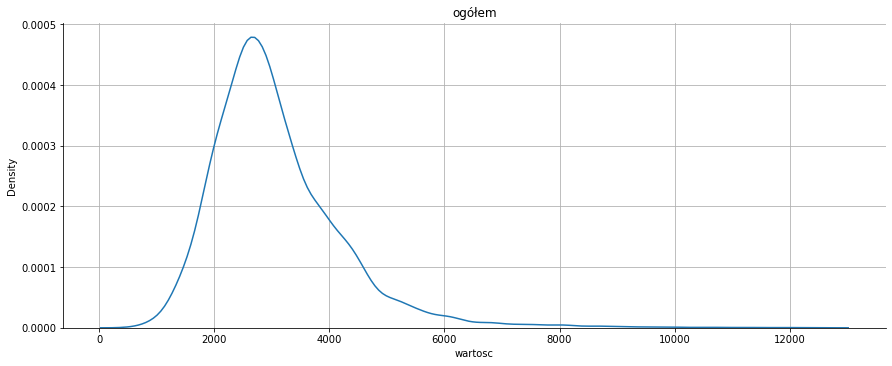

In [12]:
plot_mass_function('ogółem')

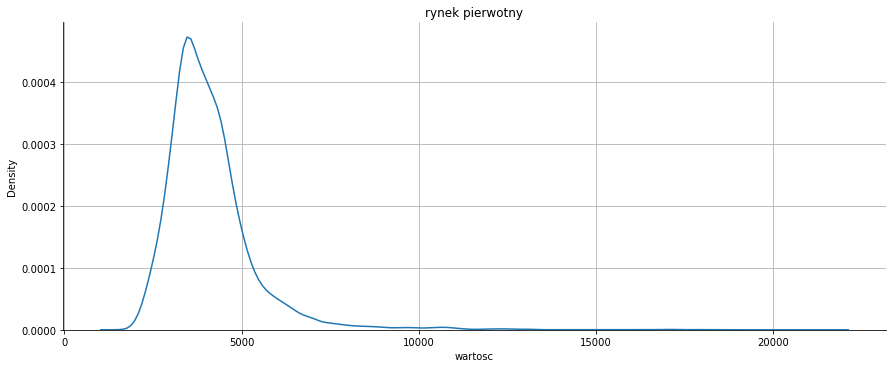

In [13]:
plot_mass_function('rynek pierwotny')

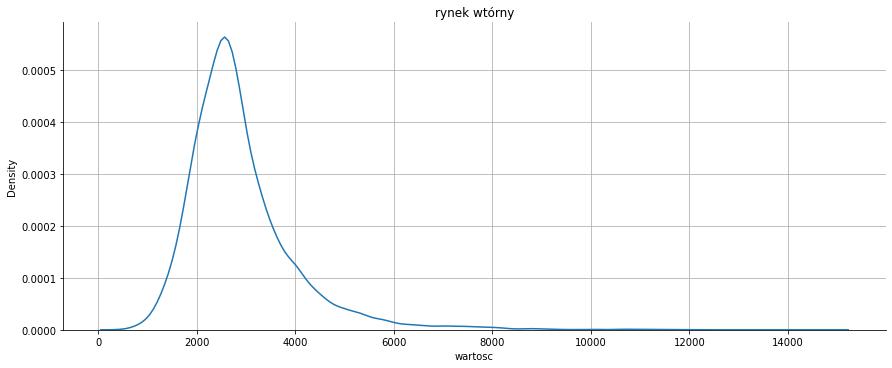

In [14]:
plot_mass_function('rynek wtórny')

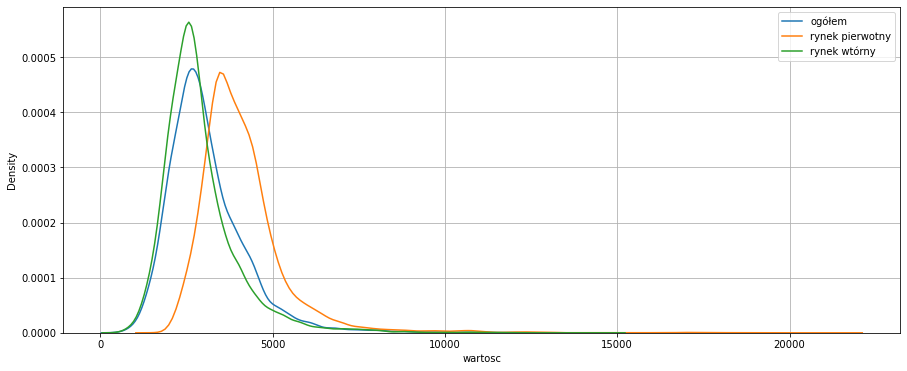

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))

transactions = mieszkania.transakcje.unique()

for transaction in transactions:
    values = mieszkania[mieszkania.transakcje == transaction].wartosc
    seaborn.kdeplot(values, ax=ax, label=transaction)

plt.grid()
ax.legend();

### Wnioski
Mieszkania na rynku wtórnym są tańsze od mieszkań z rynku pierwotnego

### Zadanie 2 (kontynuacja poprzedniego)
1. Wyświetl dystrybuantę (funkcja `ecdfplot`) wartości mieszkań dla rodzaju transakcji `ogólny`.
1. Odczytaj "na oko" z wykresu ile % mieszkań sprzedaje się za cenę poniżej 4 tys. $

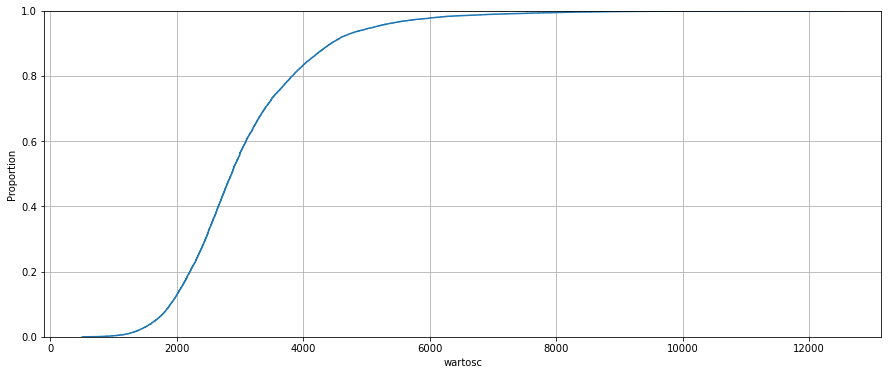

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
values = mieszkania[mieszkania.transakcje == 'ogółem'].wartosc
seaborn.ecdfplot(values, ax=ax)
plt.grid()

Za cenę poniżej 4 tys. zł sprzedaje się około 83% mieszkań

### Zadanie 3

Opis zbioru danych znajduje się w pliku z danymi.

1. Wczytaj plik `boston.txt` (zwróć uwagę na format pliku), bez ręcznej edycji tego pliku.
> Podpowiedź: możesz użyć funkcji `read_csv` z parametrami `skiprows`, `header`, `sep`.
1. Wyświetl funkcję masy prawdopodobieństwa dla ceny mieszkań.
1. Wyświetl funkcję masy prawdopodobieństwa dla dwóch zmiennych (`x` i `y`): `MEDV`, `RM`. W jakiej cenie i liczbie pokoi sprzedaje się najwięcej mieszkań? Co jeszcze można odczytać z wykresu?
1. Sprawdź jeszcze jeden dowolny atrybut i opisz wyniki.


In [17]:
boston = pd.read_csv(
    'boston.txt', 
    sep=r'\ +', 
    skiprows=22,
    header=None,
    engine='python',
)

odd = boston[boston.index.values % 2 != 0].truncate(after=2, axis=1).reset_index(drop=True)
even = boston[boston.index.values % 2 == 0].reset_index(drop=True)
boston = even.join(odd, rsuffix='r')
columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston.set_axis(columns, axis=1, inplace=True)

In [18]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


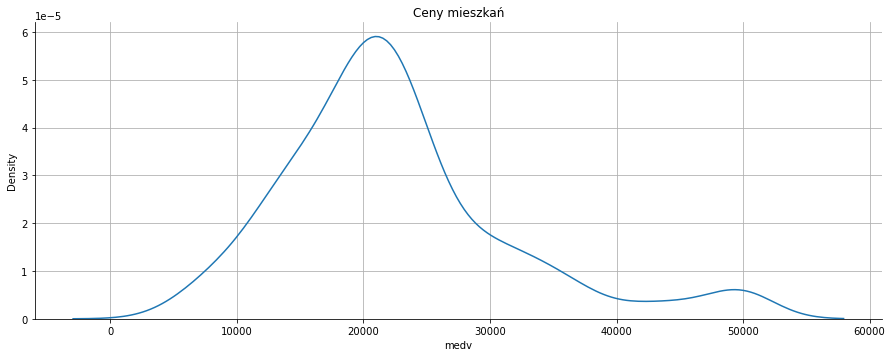

In [19]:
values = boston.medv * 1000
seaborn.displot(values, aspect=2.5, kind='kde')
plt.grid()
plt.title('Ceny mieszkań');

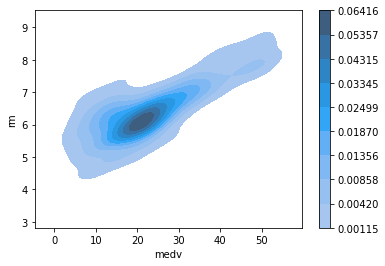

In [21]:
seaborn.kdeplot(x=boston.medv, y=boston.rm, fill=True, cbar=True);

### Wnioski

- Najwięcej mieszkań sprzedaje się w cenie około 22 000 \$
- Stosunkowo dużo mieszkań sprzedaje się za około 50 000 \$ 

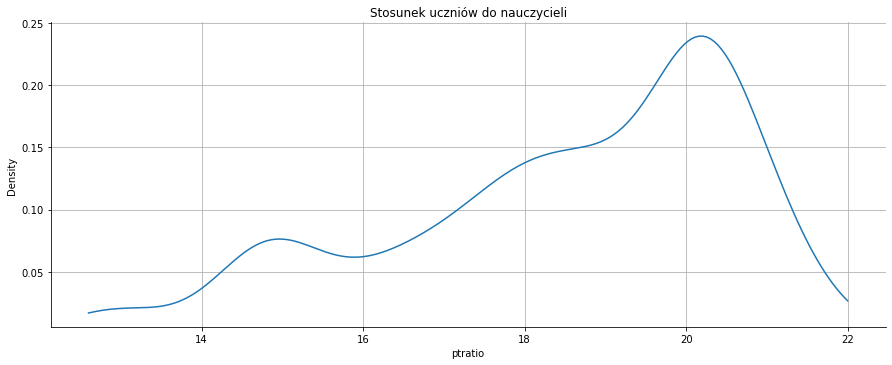

In [270]:
seaborn.displot(boston.ptratio, aspect=2.5, kind='kde', cut=0)
plt.grid()
plt.title('Stosunek uczniów do nauczycieli');

### Wnioski
- W większości miast na jednego nauczyciela przypada około 20 uczniów
- W znacznie większej ilości miast liczba uczniów na nauczyciela jest mniejsza od 20